### Attribute Information: (classes: edible=e, poisonous=p)

  - **cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s**

  - **cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s**

  -  **cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y**

  -  **bruises: bruises=t,no=f**

  -  **odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s**

  - **gill-attachment: attached=a,descending=d,free=f,notched=n**

  - **gill-spacing: close=c,crowded=w,distant=d**

  - **gill-size: broad=b,narrow=n**

  - **gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y**

  -  **stalk-shape: enlarging=e,tapering=t**

  - **stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?**

  - **stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s**

  - **stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s**

  - **stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y**

  -  **stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y**

  - **veil-type: partial=p,universal=u**

  - **veil-color: brown=n,orange=o,white=w,yellow=y**

  - **ring-number: none=n,one=o,two=t**

  - **ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z**

  -  **spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y**

  - **population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y**

  - **habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d**


# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Check if there null values in data or not.

In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


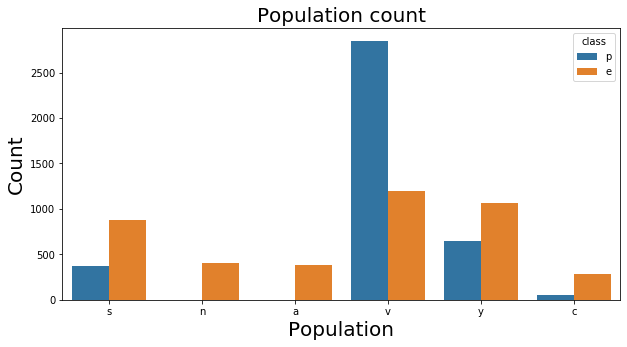

In [6]:
plt.figure(figsize=(10,5))
plt.title("Population count",fontsize=20)
sns.countplot(df["population"],hue=df["class"]);
plt.xlabel("Population",fontsize=20)
plt.ylabel("Count",fontsize=20);

## iterate over columns that contain object data type and label encode it into numerical data

In [7]:
from sklearn.preprocessing import LabelEncoder
encs = {}
for col in df.columns:
    if df[col].dtype == "object":
        encs[col] = LabelEncoder()
        df[col]   =encs[col].fit_transform(df[col])

# Split data into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df.drop("class",axis=1).values
y=df['class'].values

In [10]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
x

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Build DecisionTree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
dt=DecisionTreeClassifier().fit(X_train,y_train) # Model taraining (fitting)

In [15]:
dt_pred=dt.predict(X_test) # predict new data

In [16]:
print("Decision Tree Classifier accuracy is : ",accuracy_score(dt_pred,y_test)*100,"%")

Decision Tree Classifier accuracy is :  100.0 %


# Build Random Forest Classifier

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf=RandomForestClassifier().fit(X_train,y_train)  # Model taraining (fitting)

/home/abdo/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
rf_pred=rf.predict(X_test)  # predict new data

In [20]:
print("Radom Forest Classifier accuracy is : ",accuracy_score(rf_pred,y_test)*100,"%")

Radom Forest Classifier accuracy is :  100.0 %


# Grid search

In [2]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
             }

In [23]:
gsearch = GridSearchCV(dt, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
print("Best score: ",gsearch.best_score_," acheived by these parameters ",model)

/home/abdo/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score:  1.0  acheived by these parameters  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [24]:
gr_model=model.predict(X_test)
accuracy_score(gr_model,y_test)

In [25]:
model.score(X_test,y_test)

1.0